# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [11]:
import pandas as pd
data = pd.read_csv("Reviews.csv")

In [12]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32917 sha256=445dfcd1b56c266b8b4eb27dfd6d6cb24580aa5f2f0e5fea2efd959e0f157cee
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [13]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
tokenizer = RegexpTokenizer(r'\w+')
en_st = get_stop_words('en')
p_stemmer_ = PorterStemmer()

In [16]:
data['Lower Case'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_st])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer_.stem(i) for i in x])

In [19]:
text_ = []
for row in data['Stemming']:
  text_.append(line)

**Bigrams and Trigrams**

In [20]:
from gensim import corpora, models
bi_gram = models.Phrases(text_, min_count=5, threshold=100)
tri_gram = models.Phrases(bi_gram[text_], threshold=100)
bi_gram_mod = models.phrases.Phraser(bi_gram)
tri_gram_mod = models.phrases.Phraser(tri_gram)
print(tri_gram_mod[bi_gram_mod[text_[0]]])

['wow', 'movi', 'admit', 'first', 'heard', 'joaquin', 'phoenix', 'go', 'joker', 'surpris', 'wasn', 't', 'sure', 'go', 'pull', 'hope', 'wasn', 't', 'go', 'anoth', 'cheesi', 'rendit', 'full', 'fluff', 'unrealist', 'explan', 'joker', 'came', 'one', 'adult', 'son', 'wouldn', 't', 'keep', 'nudg', 'wake', 'pleasantli', 'surpris', 'well', 'todd', 'phillip', 'version', 'play', 'joaquin', 's', 'act', 'superb', 'feel', 'anguish', 'charact', 'go', 'right', 'point', 'lost', 'mind', 'just', 'excel', 'well', 'act', 'movi', 'almost', 'forget', 'deriv', 'dc', 'comic']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [54]:
def make_bi_grams(text_):
    return [bi_gram_mod[doc] for doc in text_]
  
def make_tri_grams(text_):
    return [trigram_mod[bigram_mod[doc]] for doc in text_]

def lemmatization(text_, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    text_out = []
    for sent in text_:
        doc = nlp(" ".join(sent)) 
        text_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return text_out

In [55]:
import spacy
data_words_bi_grams = make_bi_grams(text_)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized_ = lemmatization(data_words_bi_grams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized_[:1])

[['admit', 'first', 'hear', 'go', 'sure', 'go', 'pull', 't', 'go', 'anoth', 'cheesi', 'rendit', 'full', 'fluff', 'unrealist', 'come', 'adult', 'son', 'keep', 'nudg', 'wake', 'pleasantli', 'version', 'play', 'feel', 'anguish', 'charact', 'go', 'right', 'point', 'lose', 'mind', 'just', 'almost', 'forget']]


**Corpus and Dictionary**

In [57]:
id2word = corpora.Dictionary(data_lemmatized_)
text_ = data_lemmatized_
corpus = [id2word.doc2bow(text) for text in text_]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 4), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)]]


In [61]:
id2word[0]

'admit'

In [62]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('admit', 1),
  ('adult', 1),
  ('almost', 1),
  ('anguish', 1),
  ('anoth', 1),
  ('charact', 1),
  ('cheesi', 1),
  ('come', 1),
  ('feel', 1),
  ('first', 1),
  ('fluff', 1),
  ('forget', 1),
  ('full', 1),
  ('go', 4),
  ('hear', 1),
  ('just', 1),
  ('keep', 1),
  ('lose', 1),
  ('mind', 1),
  ('nudg', 1),
  ('play', 1),
  ('pleasantli', 1),
  ('point', 1),
  ('pull', 1),
  ('rendit', 1),
  ('right', 1),
  ('son', 1),
  ('sure', 1),
  ('t', 1),
  ('unrealist', 1),
  ('version', 1),
  ('wake', 1)]]

In [65]:
lda_model_= models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [75]:
from pprint import pprint
pprint(lda_model_.print_topics())
doc_lda_ = lda_model_[corpus]

[(0,
  '0.114*"go" + 0.029*"play" + 0.029*"wake" + 0.029*"charact" + 0.029*"full" + '
  '0.029*"sure" + 0.029*"anguish" + 0.029*"come" + 0.029*"first" + '
  '0.029*"forget"'),
 (1,
  '0.031*"go" + 0.031*"mind" + 0.031*"charact" + 0.031*"feel" + '
  '0.031*"pleasantli" + 0.031*"anoth" + 0.031*"fluff" + 0.031*"son" + '
  '0.031*"t" + 0.031*"come"'),
 (2,
  '0.032*"go" + 0.031*"admit" + 0.031*"play" + 0.031*"wake" + 0.031*"anguish" '
  '+ 0.031*"first" + 0.031*"cheesi" + 0.031*"forget" + 0.031*"son" + '
  '0.031*"adult"'),
 (3,
  '0.031*"go" + 0.031*"unrealist" + 0.031*"lose" + 0.031*"full" + '
  '0.031*"anguish" + 0.031*"son" + 0.031*"point" + 0.031*"mind" + 0.031*"play" '
  '+ 0.031*"pull"'),
 (4,
  '0.031*"go" + 0.031*"right" + 0.031*"keep" + 0.031*"version" + '
  '0.031*"forget" + 0.031*"son" + 0.031*"hear" + 0.031*"admit" + 0.031*"fluff" '
  '+ 0.031*"full"'),
 (5,
  '0.031*"go" + 0.031*"first" + 0.031*"t" + 0.031*"feel" + 0.031*"fluff" + '
  '0.031*"forget" + 0.031*"lose" + 0.031*"w

In [76]:
lsa_model = models.LsiModel(corpus, num_topics = 10, id2word = id2word)

In [74]:
print(lsa_model.print_topics(num_topics = 10))

[(0, '0.583*"go" + 0.146*"lose" + 0.146*"point" + 0.146*"right" + 0.146*"mind" + 0.146*"pleasantli" + 0.146*"unrealist" + 0.146*"pull" + 0.146*"just" + 0.146*"t"')]


In [81]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model_.log_perplexity(corpus))
coherence_model_lda_ = CoherenceModel(model=lda_model_, text=data_lemmatized_, dictionary=id2word, coherence='c_v')
coherence_lda_ = coherence_model_lda_.get_coherence()
print('\nCoherence Score: ', coherence_lda_)


Perplexity:  -3.4380914318459057


TypeError: ignored

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

Positive    61
Negative    34
Neutral     13
Name: Sentimental Analysis, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


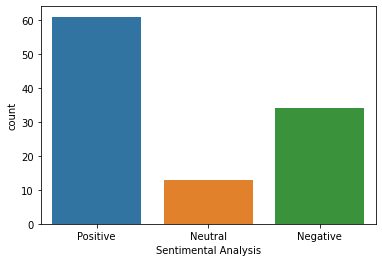

In [82]:
# Write your code here
import seaborn as sns
print(data['Sentimental Analysis'].value_counts())
sns.countplot(data['Sentimental Analysis'])




In [83]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [84]:
from nltk.corpus import stopwords
from textblob import TextBlob
data['Cleaned Text'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Cleaned Text'] = data['Cleaned Text'].str.replace('[^\w\s]','')
s = stopwords.words('english')
data['Cleaned Text'] = data['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in s))


**Feature Selection**

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tf_idf_vector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tf_idf_vector.fit(data['Review'])
x_values_ = Tf_idf_vector.transform(data['Review'])
encoder_ = LabelEncoder()
y_values_ = encoder_.fit_transform(data['Sentimental Analysis'])

I used Tfidf vector for improving the performance for allowing similar meaning terms for same representation, which reduced computional complexity. The model's precision  increases while reducing with overfitting.

In [87]:

from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values_, y_values_, test_size=0.2)

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import naive_bayes
n_b = naive_bayes.MultinomialNB()
n_b.fit(X_train, y_train)
predicted_nb_ = n_b.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_nb_)))
report_nb_ = classification_report(y_test, predicted_nb_, output_dict=True)
report_nb_

Accuracy score is 0.45454545454545453


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 9},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 3},
 '2': {'f1-score': 0.625,
  'precision': 0.45454545454545453,
  'recall': 1.0,
  'support': 10},
 'accuracy': 0.45454545454545453,
 'macro avg': {'f1-score': 0.20833333333333334,
  'precision': 0.15151515151515152,
  'recall': 0.3333333333333333,
  'support': 22},
 'weighted avg': {'f1-score': 0.2840909090909091,
  'precision': 0.20661157024793386,
  'recall': 0.45454545454545453,
  'support': 22}}

In [89]:
from sklearn import svm
svm_model_ = svm.SVC(kernel='linear')
svm_model_.fit(X_train, y_train)
predicted_model = svm_model_.predict(x_test)
print("Accuracy score is {0}".format(accuracy_score(y_test, predicted_model)))
report_ = classification_report(y_test, predicted_model, output_dict=True)
report_

Accuracy score is 0.45454545454545453


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 9},
 '1': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 3},
 '2': {'f1-score': 0.625,
  'precision': 0.45454545454545453,
  'recall': 1.0,
  'support': 10},
 'accuracy': 0.45454545454545453,
 'macro avg': {'f1-score': 0.20833333333333334,
  'precision': 0.15151515151515152,
  'recall': 0.3333333333333333,
  'support': 22},
 'weighted avg': {'f1-score': 0.2840909090909091,
  'precision': 0.20661157024793386,
  'recall': 0.45454545454545453,
  'support': 22}}

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [96]:
import csv
import pandas as pd

train_data_ = pd.read_csv("train.csv")
test_data_ = pd.read_csv("test.csv")

In [93]:
train_data_.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [94]:
print(train_data_.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [97]:
print(test_data_.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


**Exploratory Data Analysis**